In [16]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import os
data_d = pd.read_csv("diamonds_pp_2.csv")

# look at head of data
data_d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.327256,-0.934706,-1.414259,1.155454,0.308426,-0.154726,544,-1.240155,-1.194715,-1.174345
1,-1.220352,1.065862,0.349301,1.155454,-0.250585,-0.638827,810,-1.151009,-1.089649,-1.131834
2,-1.563480,1.065862,-1.414259,0.670949,0.098289,-1.688955,432,-1.409532,-1.361071,-1.358559
3,1.123975,-2.003647,0.937154,-2.629464,3.386766,0.304552,2571,0.943911,0.889102,1.362148
4,1.201126,-0.934706,-0.826406,0.670949,-1.286980,0.304552,9178,1.273750,1.283101,1.078741


In [13]:
# Describing data
print('Amount of rows and columns',data_d.shape)
data_d.describe()

Amount of rows and columns (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,53940.000000,5.394000e+04,5.394000e+04,5.394000e+04
mean,-2.787372e-16,-8.895616e-16,-1.145510e-15,-7.193685e-16,1.531737e-15,-1.514862e-12,3932.799722,2.065501e-16,-1.309380e-16,-1.072269e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3989.439738,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.076631e+00,-2.003647e+00,-2.002112e+00,-2.629464e+00,-1.185480e+01,-1.032715e+01,326.000000,-5.109073e+00,-5.020884e+00,-5.014510e+00
25%,-8.914146e-01,-9.347060e-01,-8.264057e-01,-5.535244e-01,-5.284595e-01,-6.388266e-01,950.000000,-9.103164e-01,-8.882717e-01,-8.909378e-01
50%,6.547575e-02,-4.712586e-02,-2.385525e-01,1.129185e-01,2.837806e-02,-1.547259e-01,2401.000000,-2.777527e-02,-2.147379e-02,-1.237607e-02
75%,7.424201e-01,1.065862e+00,9.371541e-01,6.709492e-01,5.191734e-01,7.406746e-01,5324.250000,7.210475e-01,7.052356e-01,7.103118e-01
max,3.430760e+00,1.065862e+00,1.525007e+00,1.975942e+00,1.301662e+01,8.443589e+00,18823.000000,4.465161e+00,4.654922e+01,4.004720e+01


In [14]:
import matplotlib.pyplot as plt

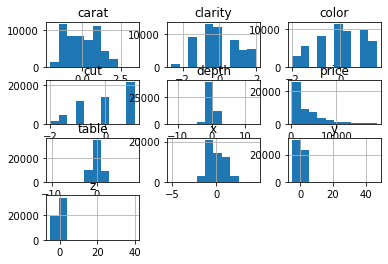

<Figure size 1440x1440 with 0 Axes>

In [16]:
# pip install matplotlib
# selecting features and labels(Price)
X = data_d[['x','y','z','carat','cut','color','clarity','depth','table']]
y = data_d[['price']]
# plotting a histogram to see what is going on
data_d.hist()
plt.figure(figsize=(20,20))
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
# splitting dataset into training(80%) and testing(20%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# trying randomforest for the first time with the preprocessed data
# inspiration: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train.values.ravel())
prediction_1 = regressor.predict(X_test)
train_predict = regressor.predict(X_train)

In [19]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Results
#MAE train
print('MAE or Mean absolute error train:', metrics.mean_absolute_error(y_train,train_predict))
# Mean absolute error
print('MAE or Mean absolute error:', metrics.mean_absolute_error(y_test,prediction_1))
# Mean Squared error
print('Mean Squared error:', mean_squared_error(y_test,prediction_1))
# R-Squared score
print('R-squared scores:',r2_score(y_test, prediction_1))

print(regressor.get_params())

MAE or Mean absolute error train: 99.18484056487661
MAE or Mean absolute error: 267.140365719406
Mean Squared error: 292670.2034610228
R-squared scores: 0.9817906208485678
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [16]:
# Tuning parameters: Source https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Parameters
P = {'n_estimators':[200,500,800,1000,1500,1600,2000,2200],
    'max_depth': [70,80,90,'none'],
    'max_features':['auto', 'sqrt']
}

gridf = GridSearchCV(regressor, P, cv =3, n_jobs=-1,verbose=1)
gridf.fit(X_train, y_train)
gridf.best_params_

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 86.6min finished
c:\users\fahad\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 1600}

In [ ]:
# as a result of the tuned parameters
# {'max_depth': 70, 'max_features': 'auto', 'n_estimators': 1600}
from sklearn.ensemble import RandomForestRegressor
#implementing randomforest with parameters manipulated
regressor = RandomForestRegressor(n_estimators=1600,max_features='auto',max_depth=80)
regressor.fit(X_train, y_train)
train_predict = regressor.predict(X_train)
prediction_1 = regressor.predict(X_test)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [21]:
# Results from the tuned parameters
# Mean absolute error
print('MAE or Mean absolute error train:', metrics.mean_absolute_error(y_train,train_predict))
print('MAE or Mean absolute error:', metrics.mean_absolute_error(y_test,prediction_1))
# Mean Squared error
print('Mean Squared error:', mean_squared_error(y_test,prediction_1))
# R-Squared score
print('R-squared scores:',r2_score(y_test, prediction_1))

MAE or Mean absolute error train: 97.7849796893391
MAE or Mean absolute error: 265.71215146416176
Mean Squared error: 291202.24560758495
R-squared scores: 0.9818819543728401
